<a href="https://colab.research.google.com/github/guilhermelaviola/BIArchitectureAndBigData/blob/main/Class07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Statistical Modeling and Data Mining Applications**
Cause-and-effect modeling is a systematic approach used to identify and represent the relationships between variables and their potential impacts. This methodology allows us to understand and predict the effects of certain actions or variables on a system or process. A classic example of a tool used in this approach is the Ishikawa diagram, also known as a fishbone diagram. This diagram helps identify, explore, and graphically represent the possible causes of a specific problem, organizing them into categories such as machine, method, material, measurement, environment, and labor.

In [1]:
# Importing all the necessary libraries:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Decision Tree package
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz # View
from six import StringIO
from IPython.display import Image
import pydotplus

In [2]:
# Downloading the dataset. Link https://drive.google.com/file/d/1H1eC5tyk5e-BL2zjwYwY7bSz2BTFIe10/view?usp=sharing
!gdown 1H1eC5tyk5e-BL2zjwYwY7bSz2BTFIe10

Downloading...
From: https://drive.google.com/uc?id=1H1eC5tyk5e-BL2zjwYwY7bSz2BTFIe10
To: /content/diabetes.csv
100% 23.8k/23.8k [00:00<00:00, 46.0MB/s]


In [3]:
# Defining the column names:
col_names = ['Pregnant', 'Glucose', 'BP', 'Skin', 'Insulin', 'BMI', 'Pedigree', 'Age', 'Label']

# Loading and displaying the dataset:
pima = pd.read_csv('diabetes.csv', header=None, names=col_names)
pima.head()

,Pregnant,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Splitting dataset into features and target variable:
feature_cols = ['Pregnant', 'Insulin', 'BMI', 'Age','Glucose','BP','Pedigree']
X = pima[feature_cols] # Features
y = pima.Label # Target

In [5]:
# Splitting the dataset into training set and test set. It is essential to understand the data separation process.
# Typically, we divide the dataset into 70% for training and 30% for testing. It's a common practice to validate the effectiveness of the model:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
# Creating Decision Tree Classifier Object.
# We use the decision tree to analyze how variables such as number of pregnancies, glucose level, blood pressure,
# skin thickness, insulin level, body mass index, diabetes pedigree function and age influence the diagnosis of diabetes:
clf = DecisionTreeClassifier()

# Training:
clf = clf.fit(X_train,y_train)

# Testing:
y_pred = clf.predict(X_test)

In [7]:
# Accuracy is the proportion of correct predictions (both positive and negative) out of the total predictions made:
print('Accuracy:',metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7012987012987013


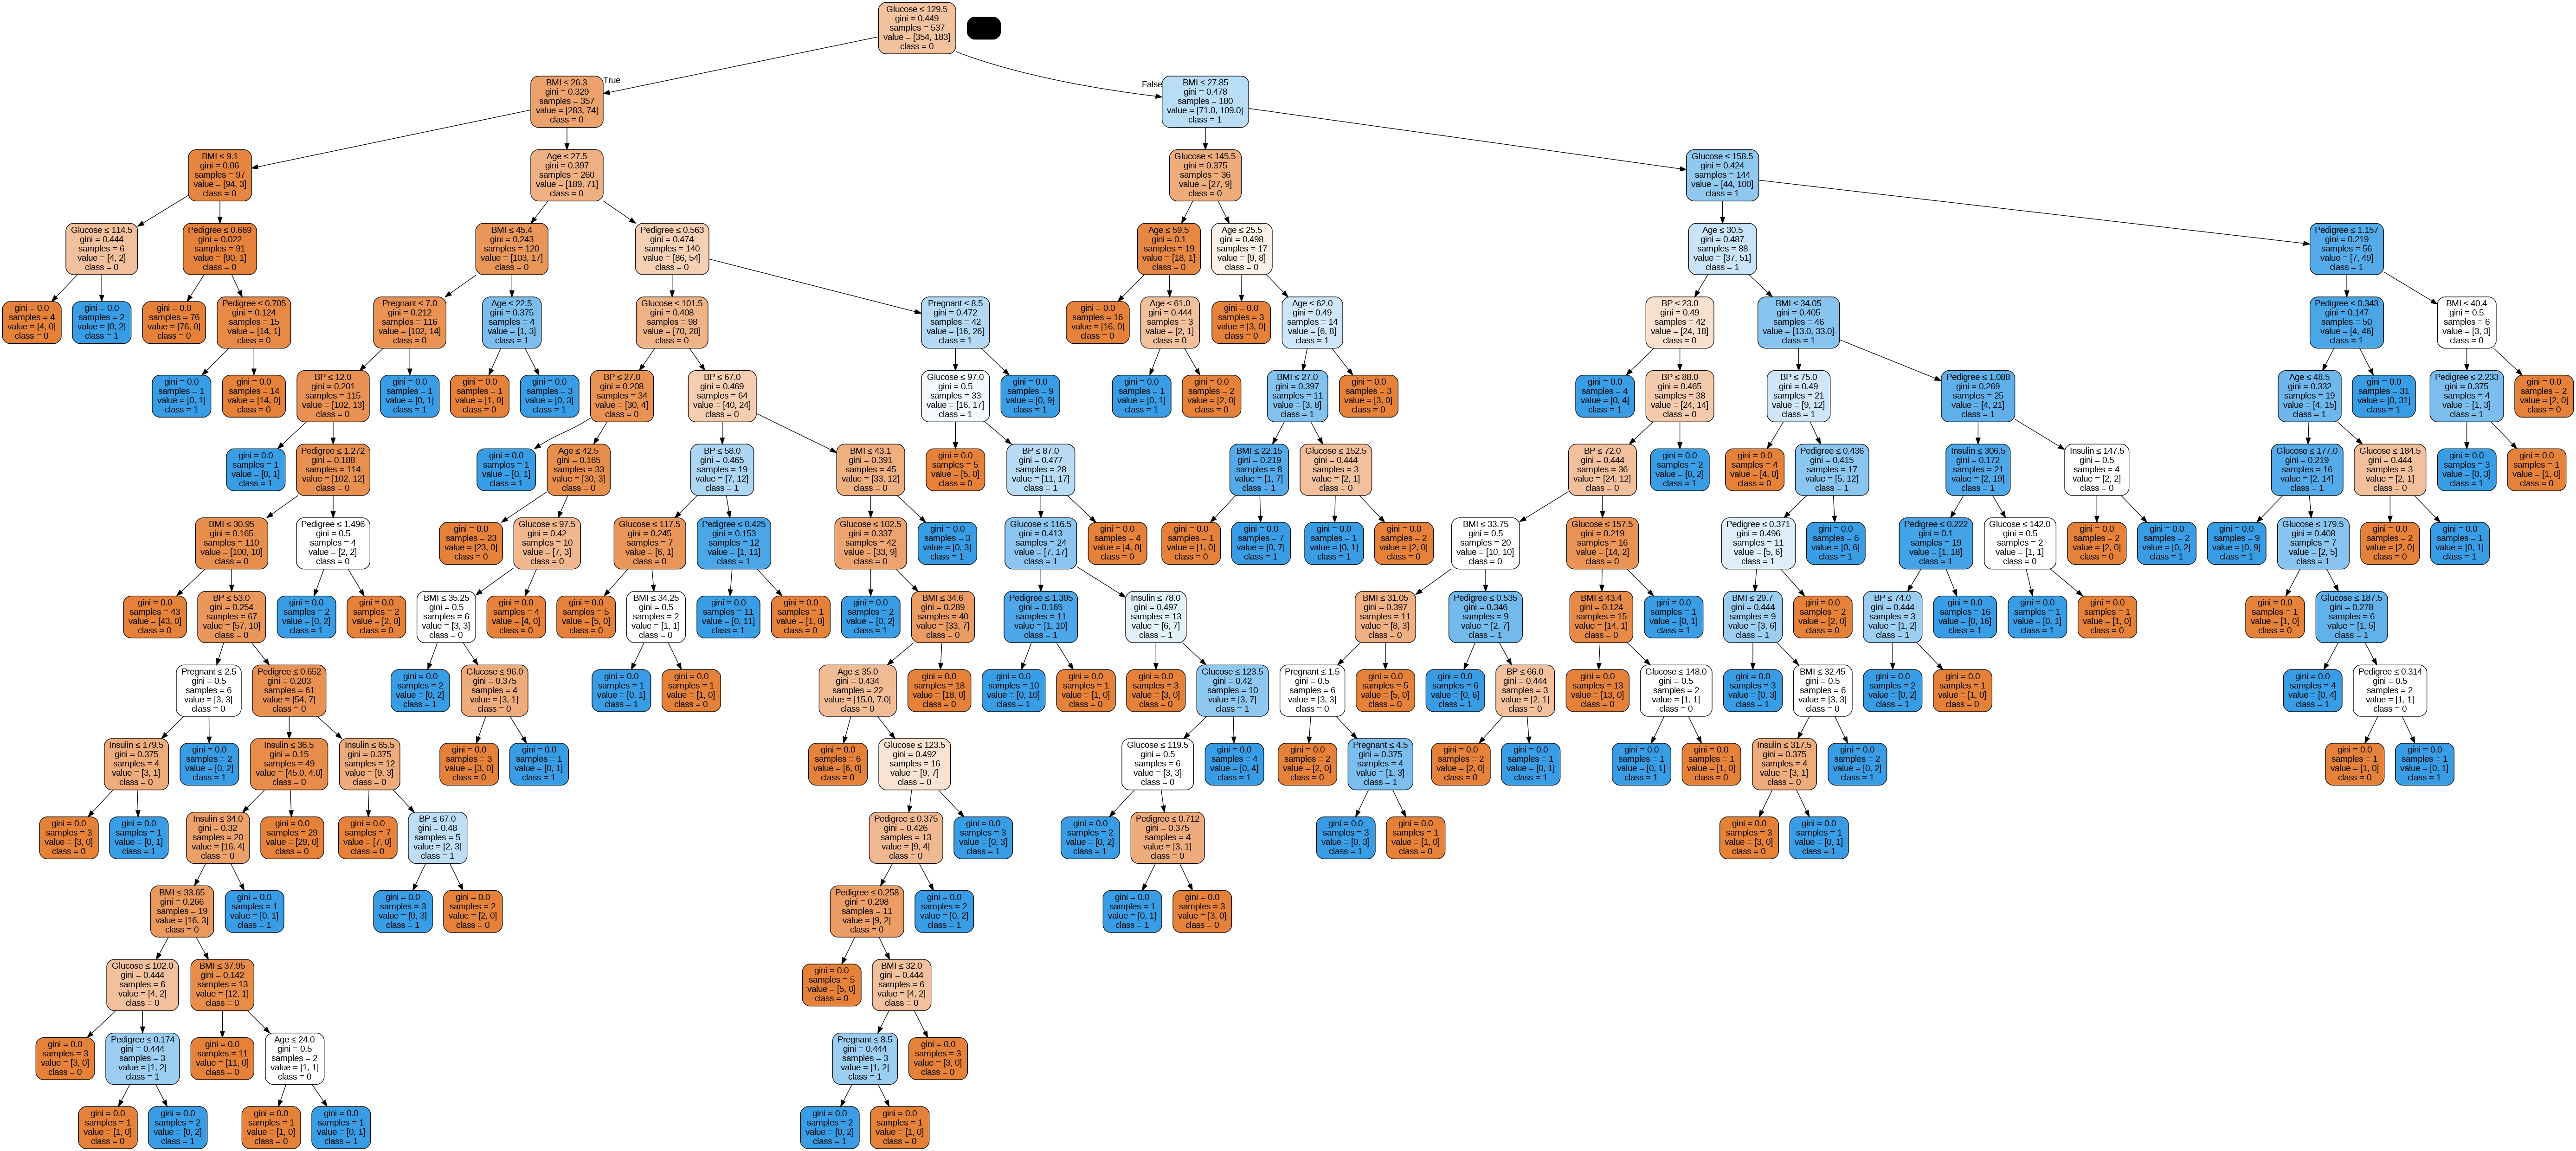

In [8]:
# Decision tree visualization is crucial to understanding the model's decision process.
# We evaluate the model's performance using metrics such as accuracy, confusion matrix, Gini index, and entropy.
# The Gini index reflects how often a random element of the dataset would be incorrectly classified, while entropy measures the disorder or impurity of the data:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_gini.png')
Image(graph.create_png())

In [10]:
# Creating a dictionary with the variables:
dic = {'score':clf.feature_importances_,'features':X_train.columns}

# Creating a dataframe with the data and displaying it:
df = pd.DataFrame(dic).sort_values('score',ascending=False)
df.head()

,score,features
4,0.325861,Glucose
2,0.203814,BMI
6,0.139425,Pedigree
5,0.134581,BP
3,0.100586,Age


In [11]:
# Defining the classifier:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Training:
clf = clf.fit(X_train, y_train)

# Testing
y_pred = clf.predict(X_test)

# Displaying the accuracy:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


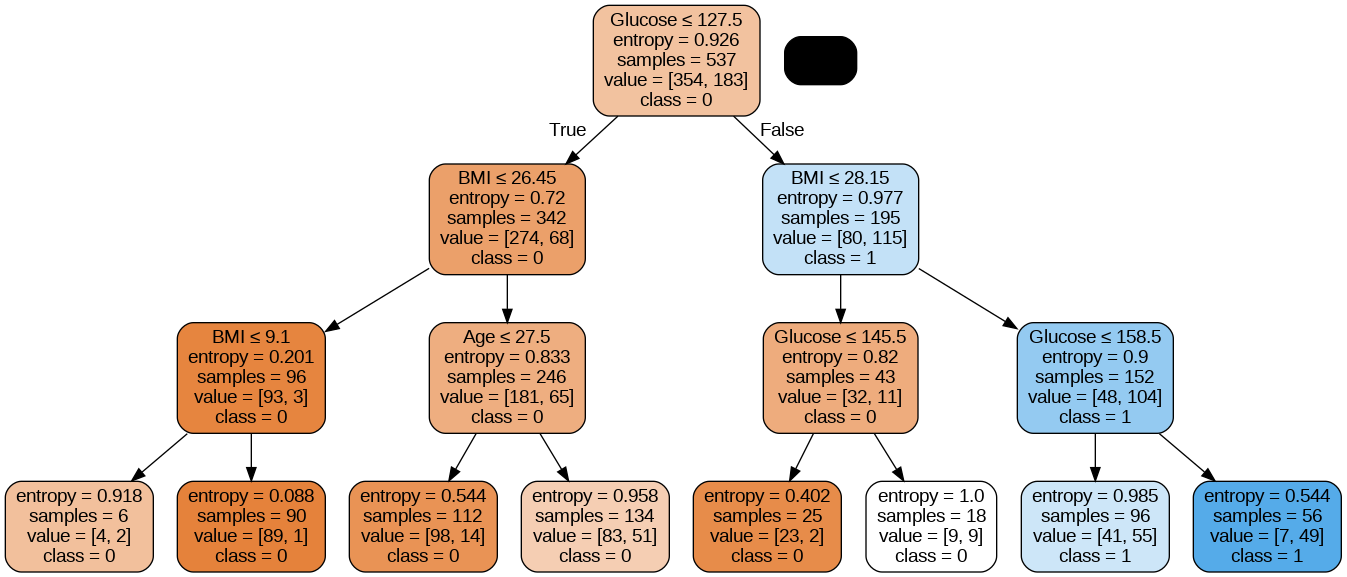

In [12]:
# Decision Tree:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_entropia.png')
Image(graph.create_png())

In [13]:
# Creating the dictionary with the variables:
dic = {'score':clf.feature_importances_,'features':X_train.columns}

# Creating the dataframe with the data and displaying it:
df = pd.DataFrame(dic).sort_values('score', ascending=False)
df.head()

,score,features
4,0.562837,Glucose
2,0.326594,BMI
3,0.110569,Age
1,0.000000,Insulin
0,0.000000,Pregnant
